<a href="https://colab.research.google.com/github/1990himanshus/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Introduction**

Airbnb, as in "Air Bed and Breakfast", is an American Company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Travellers can rent a space for multiple people to share, a shared space with private rooms, or the entire property for themselves.

**Description of Dataset Columns:**

* id: listing ID
* name: name of the listing
*host_id: host ID
*host_name: name of the host
*neighbourhood_group: location
*neighbourhood: area
*latitude: latitude coordinates
*longitude: longitude coordinates
*room_type: listing space type
*price: price in dollars
*minimum_nights: amount of nights minimum
*number_of_reviews: number of reviews
*last_review: latest review
*reviews_per_month: number of reviews per month

#**Loading Data and Importing**

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [ ]:
#Reading the datset using pandas
airbnb=pd.read_csv('/content/drive/MyDrive/Capstone 1 Almabetter AIRBnb/Copy of Airbnb NYC 2019.csv')

In [ ]:
#Top 5 rows of the data set
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Last rows of the dataset
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#No of rows and columns of the dataset
airbnb.shape

(48895, 16)

In [ ]:
#info function will tell the count of null values and the data types of the columns
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

After loading the dataset we can see a number of things. There are 16 columns and 48895 rows, which provide a very rich amount of information for deep data exploration. we can see some NaN values which requires cleaning and handling. Later we may need to continue with mapping certain values to ones and zeros for predictive analytics.

In [ ]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values before continuing with analysis.
#looking to find out first what columns have null values.
#using 'sum' function will show us how many nulls are found in each column in dataset.
#To Checking the sum of Missing/null values,if present any we can replace or delete those null value.

airbnb.isnull().sum() 

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In this case, missing data which is observed does not need too much special treatment. Looking into the nature of the dataset we can state further things:

Columns "name" and "host_name" are irrelevant and insignificant to the data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In this case, this column is irrelevant and insignificant therefore appending these values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Here I am dropping 'host_name' not only because it is insignificant but also for ethical reasons. There is no reason to continue data exploration and model training towards specific individuals based on their names because those names are assigned to actual humans, also I don't know if the are present or not. Therefore names are not important to us.

# **Univariate Analysis**

Univariate analysis is the analysis of one variable. It's major purpose is to describe patterns in the data consisting of single variable.

"Torture the data, and it will confess to anything." -Ronald Coase

In [ ]:
#let us now proceed with examining some interesting categorical unique values.

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

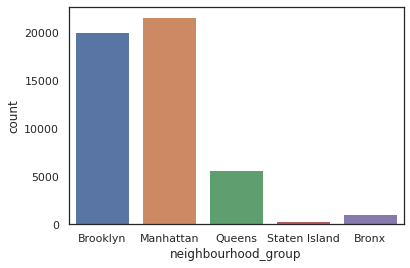

In [ ]:
sns.countplot(airbnb.neighbourhood_group)

In [ ]:
#examining the unique values of room types
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

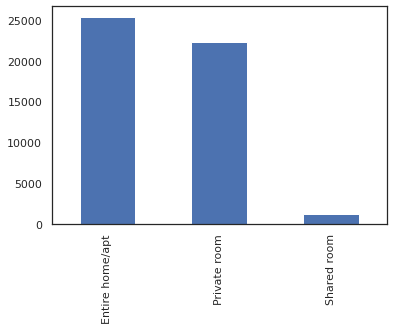

In [ ]:
pd.value_counts(airbnb['room_type']).plot(kind="bar")

By examining the unique values of room_type I found that most of the people like the entire home or apartment as it is very comfortable.

# **Analysis Exploratory Data** 

**EDA** is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**"A picture is worth a thousand words"**

In [ ]:
#now let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb.host_id.value_counts().head(5)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [ ]:
airbnb.calculated_host_listings_count

0        6
1        2
2        1
3        1
4        1
        ..
48890    2
48891    2
48892    1
48893    6
48894    1
Name: calculated_host_listings_count, Length: 48895, dtype: int64

In [ ]:
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
#setting figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_host_airbnb=pd.DataFrame(top_host)
top_host_airbnb.reset_index(inplace=True)
top_host_airbnb.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_airbnb

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


[Text(0, 0, '16098958'),
 Text(0, 0, '30283594'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '219517861')]

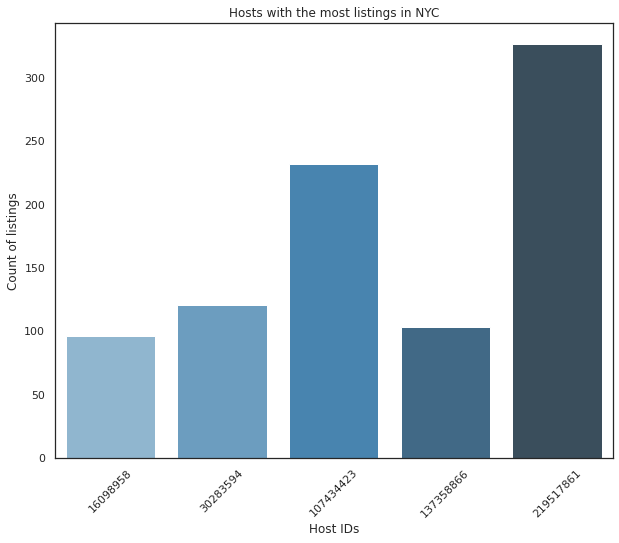

In [ ]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_airbnb,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

**Price Distribution**


**Average price of Neighbourhood Groups**

Text(0.5, 1.0, 'Average Price of Neighbourhood Groups')

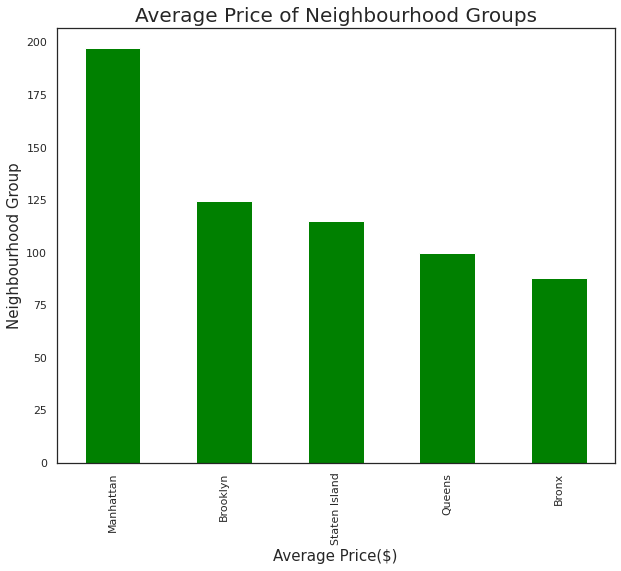

In [ ]:
plt.figure(figsize = (10,8))
airbnb.groupby("neighbourhood_group")["price"].agg("mean").sort_values(ascending = False).plot(kind='bar',color='green')
plt.xlabel('Average Price($)', size = 15)
plt.ylabel("Neighbourhood Group", size = 15)
plt.title("Average Price of Neighbourhood Groups", size=20)

**Top 10 neighbourhood with highest average price**

Text(0.5, 1.0, 'Top 10 Neighbourhood with highest average price ')

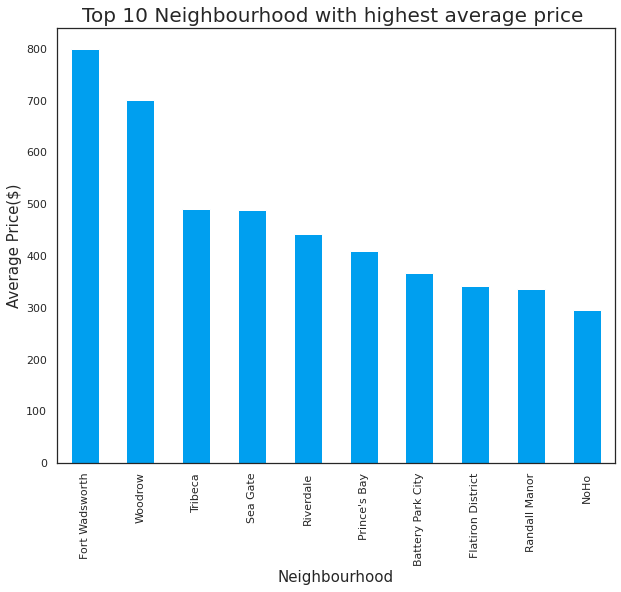

In [ ]:
plt.figure(figsize = (10,8))
airbnb.groupby("neighbourhood")["price"].agg("mean").sort_values(ascending = False).head(10).plot(kind = 'bar', color='#009FEF')
plt.xlabel('Neighbourhood', size = 15)
plt.ylabel("Average Price($)", size = 15)
plt.title("Top 10 Neighbourhood with highest average price ", size=20)

In [ ]:
#as we saw earlier from the analysis of neighbourhood, there are way too many to concentrate on it;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

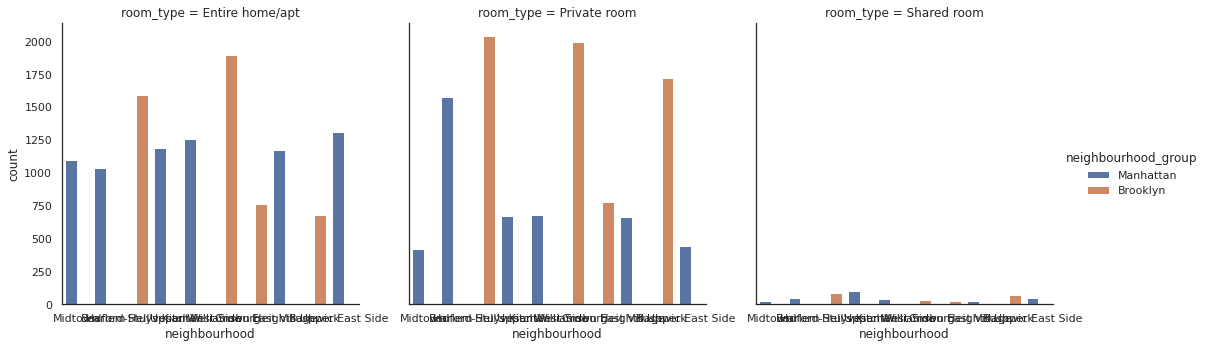

In [ ]:
#let's now combine this with our boroughs and room type for a rich visualization 

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')

In [ ]:
#let's comeback now to the 'name' column as it will require litte bit more analysis

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [ ]:
#we are going to use counter
from collections import Counter
#let's see top 10 used words by host to name their listing
_top_10_w=Counter(_names_for_count_).most_common()
_top_10_w=_top_10_w[0:10]

In [ ]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_10_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn')]

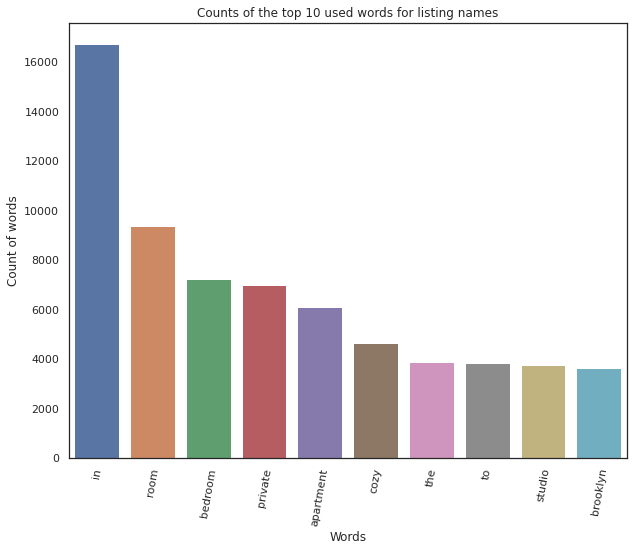

In [ ]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 10 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

In [ ]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


From this table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of Dollar65 with most of the listing under Dollar50 , and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews.

# **Conclusion**

From the entire analysis, it can be concluded that,

Most visitors don’t prefer shared rooms, they tend to visit private room or entire home.

Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NYC.

Host id 219517861 has most listing in NYC.

Manhattan has more average price count among all the neighbourhood groups.